In [1]:
%matplotlib inline
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import imageio
from numpy.random import randint, shuffle, choice

# Gradient descent

We have observed that simple simulations can solve complex problems. We will see now how we can apply this paradigm for optimization problems.

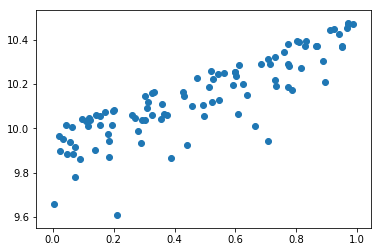

In [2]:
np.random.seed(42)
x = np.random.rand(100)
x.sort()
y = x / 2 + np.log(np.random.rand(100))/10 + 10
plt.scatter(x,y)
plt.show()

In [19]:
k, b = 0, 0     # initial values
epochs = 1000
learning_rate = 0.1

L = []   # storage for k and b through training
for i in range(epochs):
    pred = k * x + b
    L.append([k, b])
    pred_diff_k = x
    pred_diff_b = 1
    k += 2 * learning_rate * np.mean(pred_diff_k * (y - pred))
    b += 2 * learning_rate * np.mean(pred_diff_b * (y - pred))

print('Obtained parameters: k = {0:.04f}, b = {1:.04f}'.format(k, b))

Obtained parameters: k = 0.5271, b = 9.8882


In [7]:
print('Exact solution: k = {0:.04f}, b = {1:.04f}'.format(*np.polyfit(x, y, 1)))

Exact solution: k = 0.5271, b = 9.8882


In [8]:
images = []
for i in range(epochs)[::10]:
    f_line = np.poly1d(L[i])
    plt.scatter(x, y, color = 'grey')
    plt.title('k = {0:.04f}, b = {1:.04f}'.format(*L[i]))
    plt.plot(x, f_line(x), color = 'red')
    plt.ylim(9.25, 10.75)
    plt.savefig('img/grad_desc/{0}.jpg'.format(i))
    images.append(imageio.imread('img/grad_desc/{0}.jpg'.format(i)))
    plt.close()

imageio.mimsave('img/grad_desc_demo.gif', images, duration=0.1)

![Gradient descent demo](img/grad_desc_demo.gif)

This principle will be used throughout the course and is main ingredients of neural net models!

## Task. Use GD to fit 2nd degree polynomial

Fiven following data implement GD from scratch to fit 2nd degree polynomial to the following dataset:

In [ ]:
x = np.random.rand(100)
x.sort()
y = x / 2 + 5 * x**2 + np.log(np.random.rand(100))/3